<a href="https://colab.research.google.com/github/anjalixprakash/Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

Anjali Prakash

Source 1: https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset

Source 2: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd

In [57]:
# Load data
amazondata = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/Amazon Customer Behavior Survey.csv.xls'
df = pd.read_csv(amazondata)
df.head()


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


First choice: dataset 1

1. Source of data
- Kaggle

2. Brief description of data
- This data provides Amazon consumer insights
3. What is the target?
- I'm setting the target to be 'customer_satisfaction'.

4. What does one row represent? (A person? A business? An event? A product?)
- A single row represents a person

5. Is this a classification or regression problem?
- This would be a classification problem
6. How many features does the data have?
- 23
7. How many rows are in the dataset?
- 602 rows
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Cleaning the timestamp column if I plan to use it. Shortening some of the object columns while still maintaining it's relavance for easier readability.

In [58]:
incomedata = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/adult.csv'
dff = pd.read_csv(incomedata)
dff.head()
dff.shape

(48842, 15)

Second choice: dataset 2

1. Source of data
- Kaggle

2. Brief description of data
- This data set shows an individual's income based on various factors.
3. What is the target?
income
4. What does one row represent? (A person? A business? An event? A product?)
- A person

5. Is this a classification or regression problem?
- Classification, as income is split between making more or less than 50k.

6. How many features does the data have?
- 15
7. How many rows are in the dataset?
- 48842

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- There are inconsistencies in the labelling of the education column that may take some time to really clean up.

After reviewing both data sets, I've decided to proceed with the adult income data set! Now let's clean the data.

## Clean data

In [59]:
dff.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [60]:
# Remove unnecessary columns

df = dff.drop('fnlwgt', axis=1)


In [61]:
# Check for duplicate rows
duplicated_rows = df.duplicated()
df.duplicated().sum()


6374

In [62]:
# Remove duplicate rows
df = df.drop_duplicates()

In [63]:
# Get the number of null values for all columns and save as a variable to identify missing values
null_sums = df.isna().sum()
null_sums

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no null values in any columns for us to address, this is likely because all missing values appear to already be addressed as "?".

In [64]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [65]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

There appears to be no inconsistencies in the categorical columns to be addressed.

## Exploratory Visualizations

In [66]:
#importing useful packages
import seaborn as sns

In [67]:
# Checking dtypes again
df.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [68]:
# Discovering which columns are our numerical feature columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Let's create histograms and boxplots for the numerical features in our data set

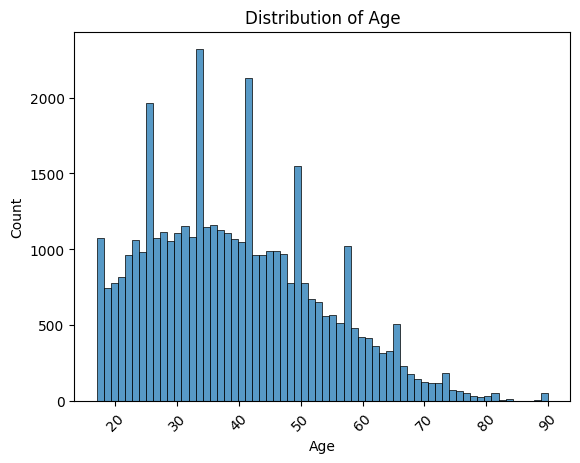

In [69]:
# Histogram for Age
ax = sns.histplot(data=df, x="age")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Age")
ax.set_xlabel("Age");

Text(0.5, 1.0, 'Distribution of Age')

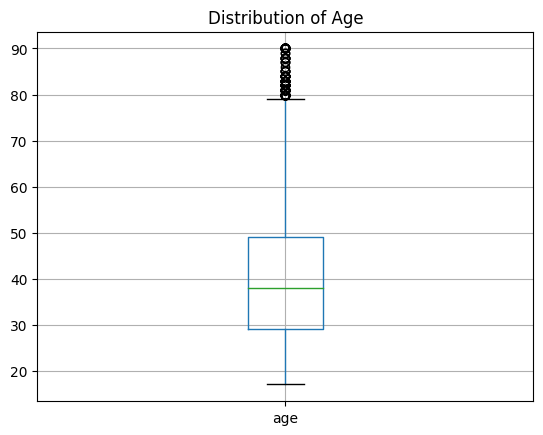

In [70]:
# Boxplot for Age
ax = df.boxplot(column ="age")
ax.set_title("Distribution of Age")


**The average age distribution appears to be between 30-50 for these individuals. However, there are quite a few outliers exceeding 80 years of age.**

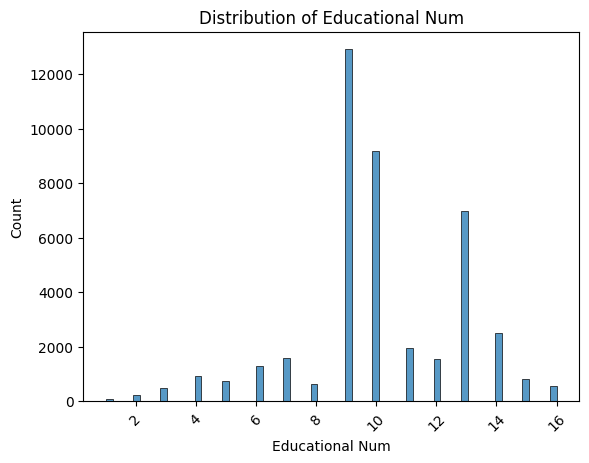

In [71]:
# Histogram for Educational Num
ax = sns.histplot(data=df, x="educational-num")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Educational Num")
ax.set_xlabel("Educational Num");

Text(0.5, 1.0, 'Distribution of Educational Num')

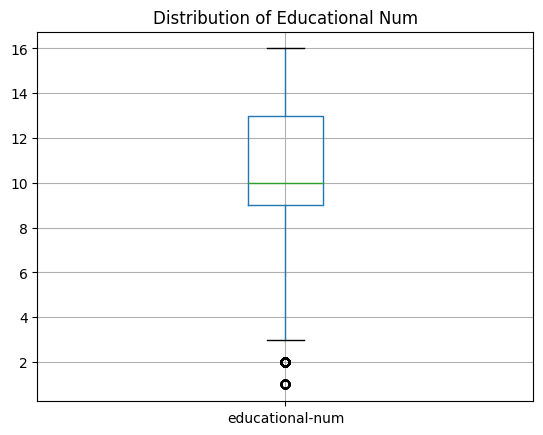

In [72]:
# Boxplot for Educational Num
ax = df.boxplot(column ="educational-num")
ax.set_title("Distribution of Educational Num")


**The educational num appears to be between 9-13, but there are a couple of outliers at 1 and 2.**

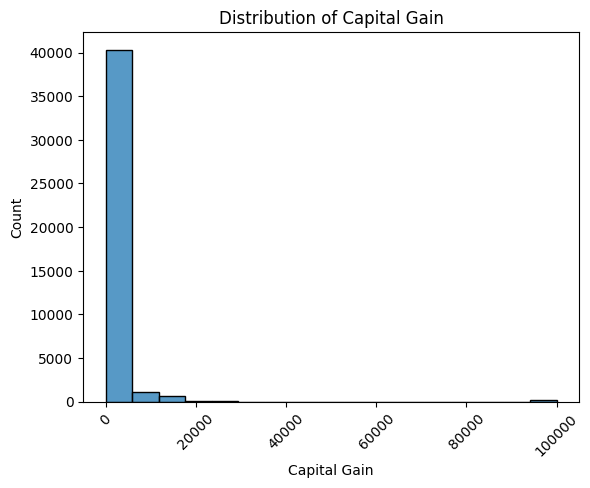

In [73]:
# Histogram for Capital Gain
ax = sns.histplot(data=df, x="capital-gain")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Capital Gain")
ax.set_xlabel("Capital Gain");

Text(0.5, 1.0, 'Distribution of Capital Gain')

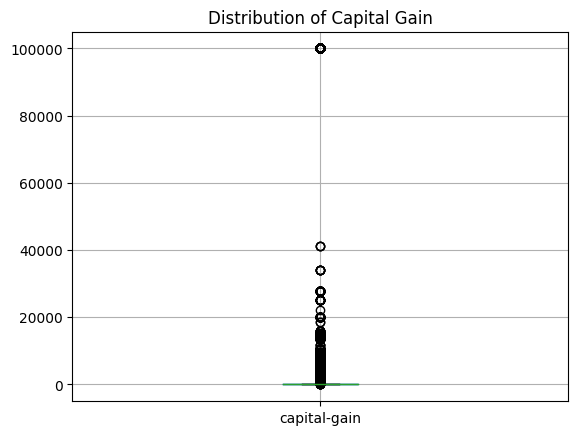

In [74]:
# Boxplot for Educational Num
ax = df.boxplot(column ="capital-gain")
ax.set_title("Distribution of Capital Gain")

**The typical capital gain distribution appears to be $0, however there are outliers spanning anywhere from $1-100000.**

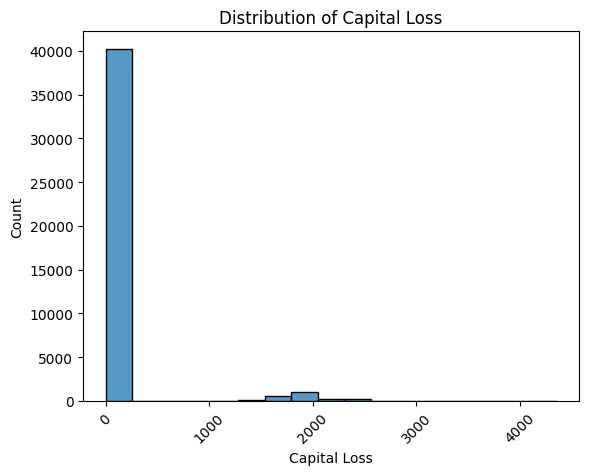

In [75]:
# Histogram for Capital Loss
ax = sns.histplot(data=df, x="capital-loss")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Capital Loss")
ax.set_xlabel("Capital Loss");

Text(0.5, 1.0, 'Distribution of Capital Loss')

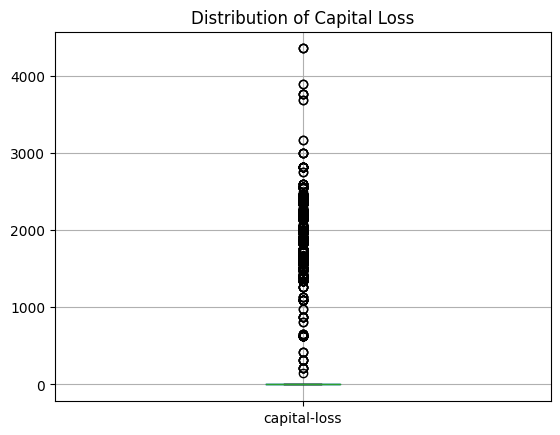

In [76]:
# Boxplot for Capital Loss
ax = df.boxplot(column ="capital-loss")
ax.set_title("Distribution of Capital Loss")

**The typical capital loss distribution appears to be $0, however there are outliers spanning anywhere from $1-4500.**

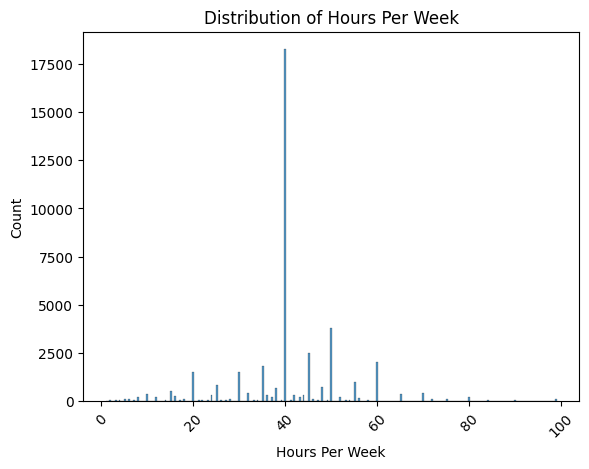

In [77]:
# Histogram for Hours Per Week
ax = sns.histplot(data=df, x="hours-per-week")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Hours Per Week")
ax.set_xlabel("Hours Per Week");

Text(0.5, 1.0, 'Distribution of Hours Per Week')

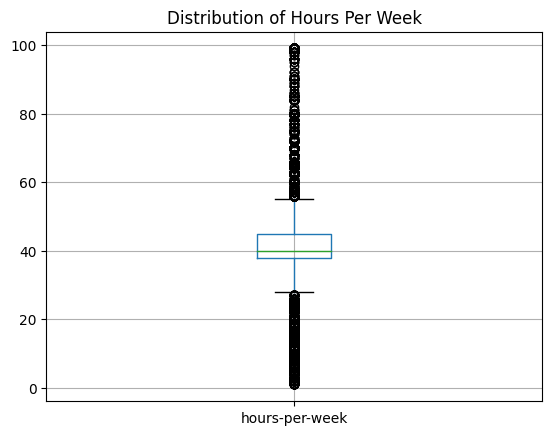

In [78]:
# Boxplot for Hours Per Week
ax = df.boxplot(column ="hours-per-week")
ax.set_title("Distribution of Hours Per Week")

**The typical hours per week worked appears to be between 38-45 hours, however there are outliers of less than 25 hours and greater than 55 hours per week.**

In [79]:
# Discovering which columns are our categorical feature columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

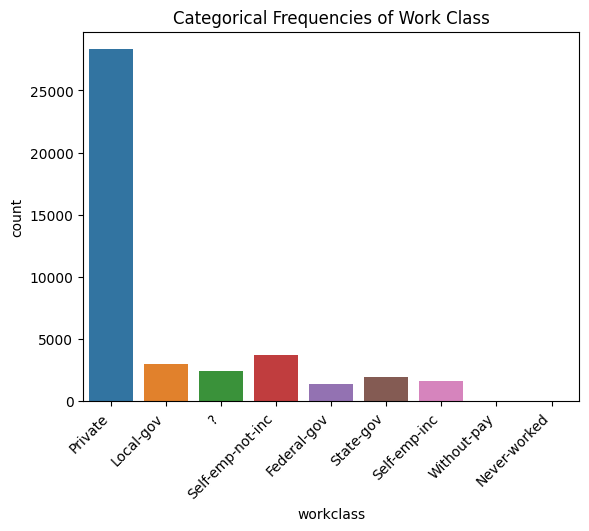

In [80]:
# Univariate countplot of Work Class
ax = sns.countplot(data=df, x='workclass')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Work Class");

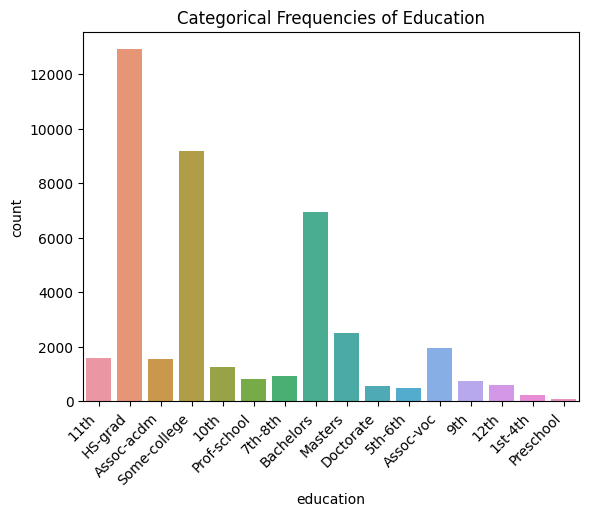

In [81]:
# Univariate countplot of Education
ax = sns.countplot(data=df, x='education')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Education");

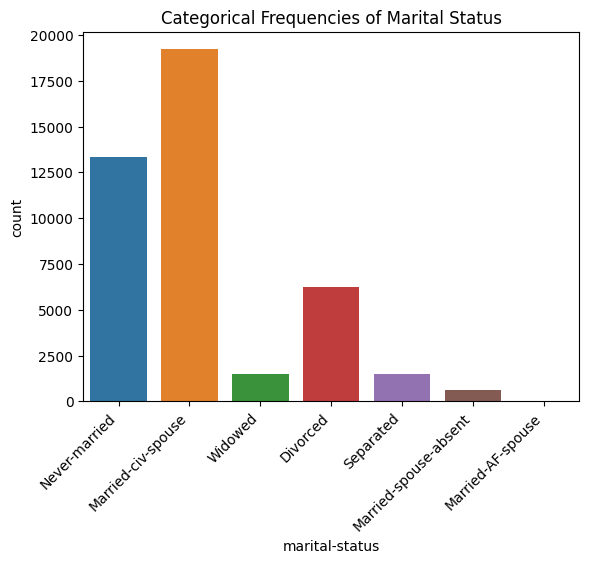

In [82]:
# Univariate countplot of Marital Status
ax = sns.countplot(data=df, x='marital-status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Marital Status");

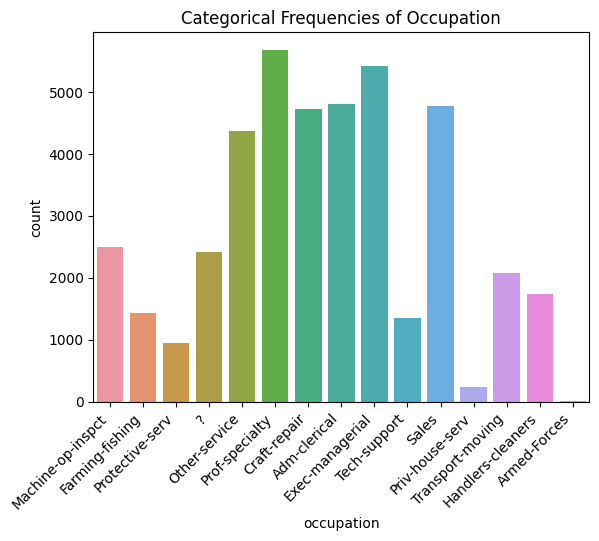

In [83]:
# Univariate countplot of Occupation
ax = sns.countplot(data=df, x='occupation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Occupation");

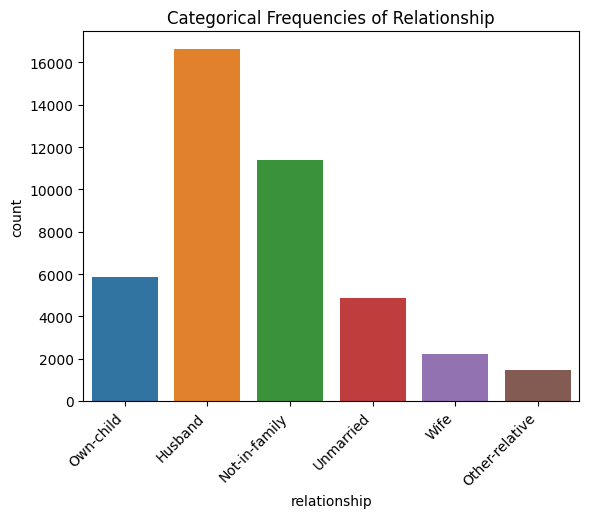

In [84]:
# Univariate countplot of Relationship
ax = sns.countplot(data=df, x='relationship')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Relationship");

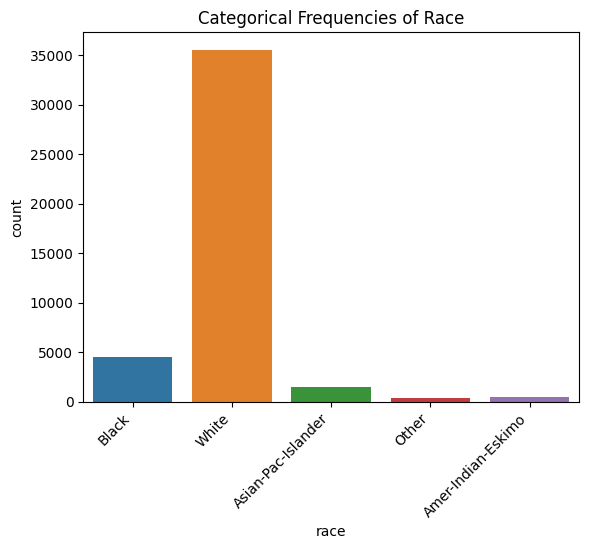

In [85]:
# Univariate countplot of Race
ax = sns.countplot(data=df, x='race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Race");

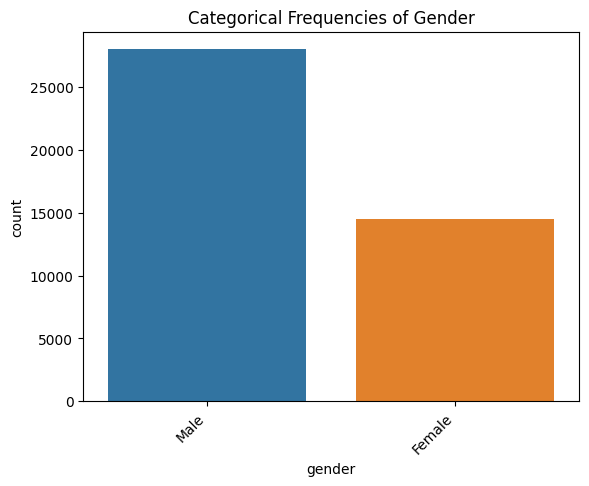

In [86]:
# Univariate countplot of Item Fat Content
ax = sns.countplot(data=df, x='gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Gender");

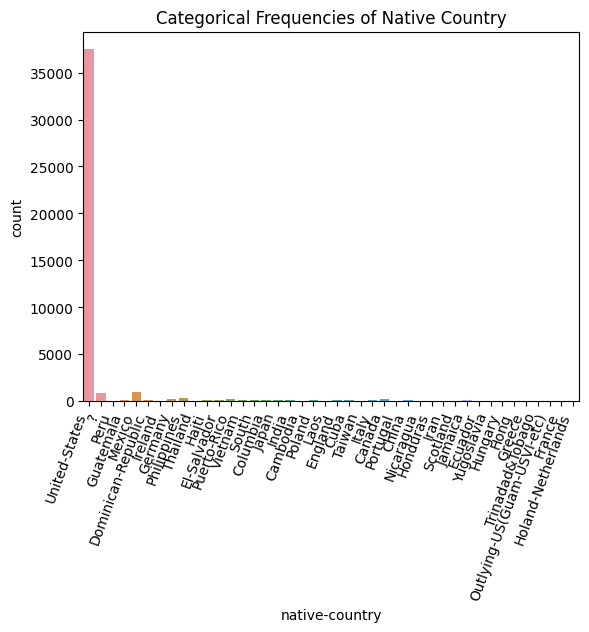

In [87]:
# Univariate countplot of Native Country
ax = sns.countplot(data=df, x='native-country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right');
ax.set_title("Categorical Frequencies of Native Country");

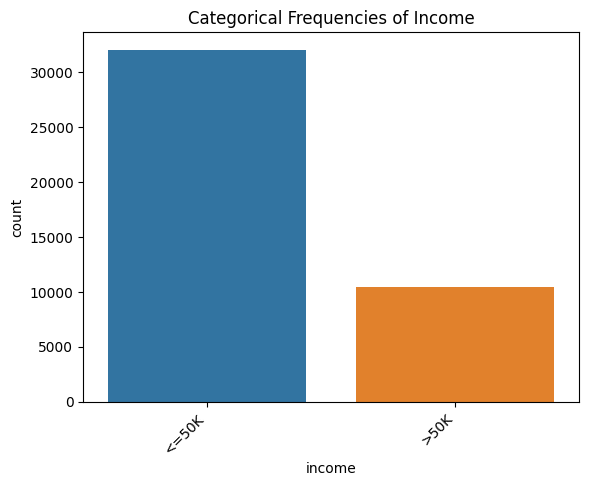

In [88]:
# Univariate countplot of Income
ax = sns.countplot(data=df, x='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Income");